# Алгоритм Кадане

Алгоритм Кадане - мощный инструмент, решающий задачу о нахождении максимальной суммы подмассива.

Своё применение он нашел в следующих областях:
1. Анализ финансов (нахождение наибольшей прибыли за определённый период времени)
2. Анализ изображений (нахождение ярких участков на изображении)
3. Анализ работы серверов (нахождение периода с наибольшей нагрузкой)
4. Анализ климатических данных (нахождение периода с наибольшей среднесуточной температурой)
5. Распознавание речи (нахождение участков аудио с наибольшей интенсивностью звука)

Существует несколько способов решения данных задач, но алгоритм Кадане является наиболее эффективным, поскольку позволяет решить их за линейное время O(n).

### Задача для анализа финансов

Дано: Массив чисел с данными о прибыли магазина.
Необходимо: Проанализировать прибыль за первую неделю после открытия. Найти временной интервал с наибольшей прибылью.

#### Решение


Период: с 1 по 3
Наибольшая сумма: 10


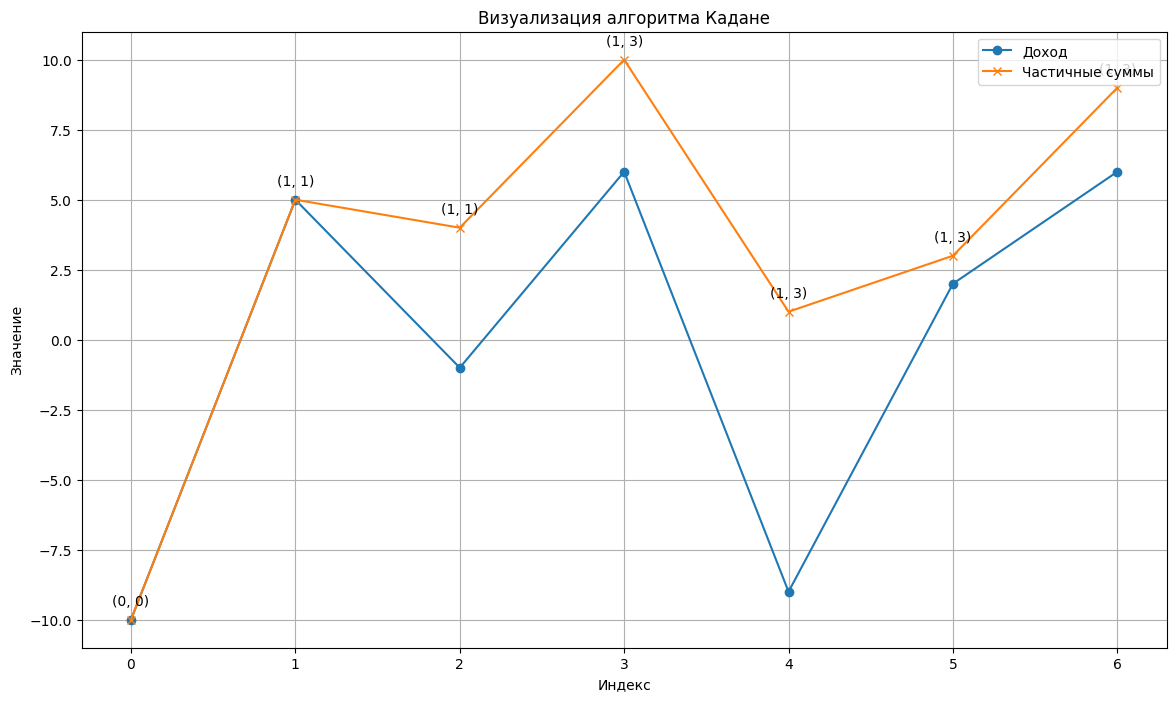

,Доход,Частичные суммы,Периоды
0,-10,-10,"(0, 0)"
1,5,5,"(1, 1)"
2,-1,4,"(1, 1)"
3,6,10,"(1, 3)"
4,-9,1,"(1, 3)"
5,2,3,"(1, 3)"
6,6,9,"(1, 3)"


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Входные данные
income = [-10, 5, -1, 6, -9, 2, 6]

# Алгоритм Кадане с модификацией для визуализации
def kadane(income):
    current_sum = max_sum = -1e9
    start = end = 0
    partial_sums = []
    periods = []

    for i, value in enumerate(income):
        if current_sum < 0:
            current_sum = value
            start = i
        else:
            current_sum += value

        if current_sum > max_sum:
            max_sum = current_sum
            end = i
            
        partial_sums.append(current_sum)
        periods.append((start, end))
    
    print(f"\nПериод: с {start} по {end}")
    print(f"Наибольшая сумма: {max_sum}")
    
    return periods, partial_sums

# Получаем данные для визуализации
periods, partial_sums = kadane(income)

# Создаем DataFrame для удобной работы и визуализации
df = pd.DataFrame({
    'Доход': income,
    'Частичные суммы': partial_sums,
    'Периоды': periods
})

# Построение графика
plt.figure(figsize=(14, 8))
plt.plot(df['Доход'], label='Доход', marker='o')
plt.plot(df['Частичные суммы'], label='Частичные суммы', marker='x')

for i, period in enumerate(df['Периоды']):
    plt.annotate(f'{period}', (i, df['Частичные суммы'][i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Визуализация алгоритма Кадане')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Выводим DataFrame для лучшего понимания
df

Ответом является период с наибольшей прибылью и суммарная прибыль за данный период.
В данном случае это элементы с 1 по 3, а суммарная прибыль составила 10р (max_sum).

#### Объяснение

Инициализуруем 4 переменные:
start - начало периода
end - конец периода
current_sum - сумма, которую мы накапливаем при прохождении элемента массива (Начальное значение всегда равно 0) 
max_sum - максимальное значение current_sum, полученное в ходе работы алгоритма (Начальное значение равно минимально возможному значению для наглядности, 
но при первой итерации цикла будет присвоено значение первого элемента массива)

Работа алгоритма:
1. Проходим каждый элемент массива. К текущей сумме добавляем значение i-того элемента.
2. Если максимальная сумма меньше текущей, то приравниваем максимальную сумму к текущей.
3. Если текущая сумма меньше i-того элемента, то приравниваем текущую сумму к данному элементу. (Опускаем сумму всех элементов до i-того,
поскольку она меньше значения самого элемента, и начинаем суммировать от него)